# Introduzione al pacchetto Pandas

Pandas è una libreria ampiamente utilizzata nell'analisi dei dati e nel machine learning.
Organizza i dati in maniera tabellare, similmente ai fogli di calcolo, ma con funzionalità molto più evolute.

Rispetto a ```numpy``` le colonne possono avere dei nomi, possono ciascuna avere tipi diversi, e sono indicizzate.

* <a href="https://pandas.pydata.org/">Riferimenti</a>.
* <a href="https://youtu.be/vmEHCJofslg">Video tutorial</a>.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import wget

Legiamo i dati sulla pandemia covid 19 dal repository [GitHub](https://github.com/pcm-dpc/COVID-19) del Dipartimento di Protezione Civile. È anche possibile importare da un file in formato xlsx.

La documentazione sui vari campi si trova [sempre su Git](https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-covid19-italia.md).

In [3]:
wget.download('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', out='data')

'data/dpc-covid19-ita-regioni.csv'

In [2]:
df = pd.read_csv('data/dpc-covid19-ita-regioni.csv')

In [3]:
# Load directly from URL, without intermediate local download
#
#df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

Si può visualizzare la struttura, mostrandole prime e le ultime righe della tabella.

In [4]:
df

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,2022-03-14T17:00:00,ITA,19,Sicilia,38.115697,13.362357,860,65,925,229177,...,DECEDUTI: N. 1 IL 14/03/2022 - N. 1 IL 13/03/2...,1.0,NaN,Sul numero complessivo dei casi confermati com...,485637.0,374501.0,4433991.0,6784842.0,ITG,ITG1
15746,2022-03-14T17:00:00,ITA,9,Toscana,43.769231,11.255889,643,38,681,28524,...,NaN,2.0,NaN,NaN,566411.0,331999.0,6458732.0,6055447.0,ITI,ITI1
15747,2022-03-14T17:00:00,ITA,10,Umbria,43.106758,12.388247,166,5,171,15260,...,- Si fa presente che 3 dei ricoveri non UTI ap...,0.0,NaN,NaN,122515.0,79223.0,1549599.0,2267453.0,ITI,ITI2
15748,2022-03-14T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,19,1,20,926,...,NaN,0.0,NaN,NaN,13728.0,17825.0,135494.0,341295.0,ITC,ITC2


```df.head``` mostra le prime righe in formato testuale.

In [5]:
print(df.head(20))

                   data stato  codice_regione  denominazione_regione  \
0   2020-02-24T18:00:00   ITA              13                Abruzzo   
1   2020-02-24T18:00:00   ITA              17             Basilicata   
2   2020-02-24T18:00:00   ITA              18               Calabria   
3   2020-02-24T18:00:00   ITA              15               Campania   
4   2020-02-24T18:00:00   ITA               8         Emilia-Romagna   
5   2020-02-24T18:00:00   ITA               6  Friuli Venezia Giulia   
6   2020-02-24T18:00:00   ITA              12                  Lazio   
7   2020-02-24T18:00:00   ITA               7                Liguria   
8   2020-02-24T18:00:00   ITA               3              Lombardia   
9   2020-02-24T18:00:00   ITA              11                 Marche   
10  2020-02-24T18:00:00   ITA              14                 Molise   
11  2020-02-24T18:00:00   ITA              21           P.A. Bolzano   
12  2020-02-24T18:00:00   ITA              22            P.A. Tr

Stampiamo l'elenco delle colonne:

In [6]:
print(df.columns)

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening',
       'totale_casi', 'tamponi', 'casi_testati', 'note',
       'ingressi_terapia_intensiva', 'note_test', 'note_casi',
       'totale_positivi_test_molecolare',
       'totale_positivi_test_antigenico_rapido', 'tamponi_test_molecolare',
       'tamponi_test_antigenico_rapido', 'codice_nuts_1', 'codice_nuts_2'],
      dtype='object')


Selezioniamo una specifica colonna:

In [7]:
df['denominazione_regione']

0               Abruzzo
1            Basilicata
2              Calabria
3              Campania
4        Emilia-Romagna
              ...      
15745           Sicilia
15746           Toscana
15747            Umbria
15748     Valle d'Aosta
15749            Veneto
Name: denominazione_regione, Length: 15750, dtype: object

Equivalentemente:

In [8]:
df.denominazione_regione

0               Abruzzo
1            Basilicata
2              Calabria
3              Campania
4        Emilia-Romagna
              ...      
15745           Sicilia
15746           Toscana
15747            Umbria
15748     Valle d'Aosta
15749            Veneto
Name: denominazione_regione, Length: 15750, dtype: object

In [9]:
df.denominazione_regione[3]

'Campania'

Selezioniamo più colonne:

In [10]:
df1 = df[['denominazione_regione', 'data', 'terapia_intensiva']]
df1

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0
3,Campania,2020-02-24T18:00:00,0
4,Emilia-Romagna,2020-02-24T18:00:00,2
...,...,...,...
15745,Sicilia,2022-03-14T17:00:00,65
15746,Toscana,2022-03-14T17:00:00,38
15747,Umbria,2022-03-14T17:00:00,5
15748,Valle d'Aosta,2022-03-14T17:00:00,1


Selezioniamo alcune righe in base all'indice. La documentazione dettagliata è [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [11]:
df1.iloc[0]

denominazione_regione                Abruzzo
data                     2020-02-24T18:00:00
terapia_intensiva                          0
Name: 0, dtype: object

In [12]:
df1.iloc[0:3]

,denominazione_regione,data,terapia_intensiva
0,Abruzzo,2020-02-24T18:00:00,0
1,Basilicata,2020-02-24T18:00:00,0
2,Calabria,2020-02-24T18:00:00,0


Selezioniamo una cella individualmente. Questa modalità è simile al modo di indirizzare una cella in un foglio di calcolo (excel, google spreadsheet, ...)

In [13]:
df1.iloc[0,0]

'Abruzzo'

In [14]:
df1['denominazione_regione']=="Campania"

0        False
1        False
2        False
3         True
4        False
         ...  
15745    False
15746    False
15747    False
15748    False
15749    False
Name: denominazione_regione, Length: 15750, dtype: bool

Selezioniamo le righe in base ad una condizione booleana. Ulteriore documentazione si trova [qui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).

In [15]:
df_campania = df1.loc[df1['denominazione_regione']=="Campania"]
df_campania

,denominazione_regione,data,terapia_intensiva
3,Campania,2020-02-24T18:00:00,0
24,Campania,2020-02-25T18:00:00,0
45,Campania,2020-02-26T18:00:00,0
66,Campania,2020-02-27T18:00:00,0
87,Campania,2020-02-28T18:00:00,0
...,...,...,...
15648,Campania,2022-03-10T17:00:00,26
15669,Campania,2022-03-11T17:00:00,25
15690,Campania,2022-03-12T17:00:00,28
15711,Campania,2022-03-13T17:00:00,32


Iterazione su tutte le righe

In [16]:
i = 0
for index, row in df_campania.iterrows():
    print(i, index, row['data'], row['terapia_intensiva'])
    i += 1

0 3 2020-02-24T18:00:00 0
1 24 2020-02-25T18:00:00 0
2 45 2020-02-26T18:00:00 0
3 66 2020-02-27T18:00:00 0
4 87 2020-02-28T18:00:00 0
5 108 2020-02-29T17:00:00 0
6 129 2020-03-01T17:00:00 0
7 150 2020-03-02T18:00:00 0
8 171 2020-03-03T18:00:00 0
9 192 2020-03-04T17:00:00 0
10 213 2020-03-05T17:00:00 0
11 234 2020-03-06T17:00:00 0
12 255 2020-03-07T18:00:00 0
13 276 2020-03-08T18:00:00 7
14 297 2020-03-09T18:00:00 8
15 318 2020-03-10T18:00:00 8
16 339 2020-03-11T17:00:00 11
17 360 2020-03-12T17:00:00 11
18 381 2020-03-13T17:00:00 19
19 402 2020-03-14T17:00:00 17
20 423 2020-03-15T17:00:00 22
21 444 2020-03-16T17:00:00 22
22 465 2020-03-17T17:00:00 24
23 486 2020-03-18T17:00:00 24
24 507 2020-03-19T17:00:00 36
25 528 2020-03-20T17:00:00 41
26 549 2020-03-21T17:00:00 87
27 570 2020-03-22T17:00:00 99
28 591 2020-03-23T17:00:00 110
29 612 2020-03-24T17:00:00 181
30 633 2020-03-25T17:00:00 123
31 654 2020-03-26T17:00:00 114
32 675 2020-03-27T17:00:00 113
33 696 2020-03-28T17:00:00 132
34 717

565 11868 2021-09-11T17:00:00 21
566 11889 2021-09-12T17:00:00 22
567 11910 2021-09-13T17:00:00 21
568 11931 2021-09-14T17:00:00 21
569 11952 2021-09-15T17:00:00 22
570 11973 2021-09-16T17:00:00 24
571 11994 2021-09-17T17:00:00 26
572 12015 2021-09-18T17:00:00 24
573 12036 2021-09-19T17:00:00 22
574 12057 2021-09-20T17:00:00 20
575 12078 2021-09-21T17:00:00 16
576 12099 2021-09-22T17:00:00 15
577 12120 2021-09-23T17:00:00 14
578 12141 2021-09-24T17:00:00 18
579 12162 2021-09-25T17:00:00 15
580 12183 2021-09-26T17:00:00 18
581 12204 2021-09-27T17:00:00 19
582 12225 2021-09-28T17:00:00 18
583 12246 2021-09-29T17:00:00 19
584 12267 2021-09-30T17:00:00 21
585 12288 2021-10-01T17:00:00 21
586 12309 2021-10-02T17:00:00 22
587 12330 2021-10-03T17:00:00 18
588 12351 2021-10-04T17:00:00 17
589 12372 2021-10-05T17:00:00 16
590 12393 2021-10-06T17:00:00 15
591 12414 2021-10-07T17:00:00 17
592 12435 2021-10-08T17:00:00 16
593 12456 2021-10-09T17:00:00 13
594 12477 2021-10-10T17:00:00 12
595 12498 

Un minimo di statistica...

In [17]:
df.loc[df['denominazione_regione']=='Campania'].describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,750.0,7.500000e+02,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,162.000000,162.000000,7.500000e+02,7.500000e+02,6.950000e+02,467.000000,424.000000,424.000000,4.240000e+02,4.240000e+02
mean,15.0,4.083957e+01,14.25085,717.316000,60.852000,778.168000,45251.470667,46029.638667,164.306667,1685.204000,...,30418.993827,1237.037037,3.059690e+05,3.981580e+06,2.178860e+06,6.582441,461127.863208,48486.639151,4.983063e+06,1.593638e+06
std,0.0,1.422034e-14,0.00000,612.201905,56.646334,665.511569,56655.875301,57126.424514,2894.165912,3377.176659,...,43478.864228,1100.491939,3.071728e+05,3.834290e+06,1.526869e+06,6.392320,171256.343210,100281.079850,1.574914e+06,1.663930e+06
min,15.0,4.083957e+01,14.25085,0.000000,0.000000,0.000000,0.000000,0.000000,-48092.000000,-229.000000,...,0.000000,0.000000,0.000000e+00,1.000000e+01,3.499400e+04,0.000000,204923.000000,73.000000,2.207249e+06,1.353000e+03
25%,15.0,4.083957e+01,14.25085,223.000000,17.000000,236.500000,2392.500000,3019.750000,-190.000000,111.250000,...,4944.500000,76.000000,6.679500e+03,4.084312e+05,4.420935e+05,1.000000,381666.500000,11588.000000,3.931319e+06,3.966732e+05
50%,15.0,4.083957e+01,14.25085,439.500000,31.000000,481.500000,10456.500000,10779.500000,14.000000,536.000000,...,7782.000000,1282.000000,2.783970e+05,3.028516e+06,2.453547e+06,4.000000,426421.500000,11588.000000,4.892544e+06,9.862505e+05
75%,15.0,4.083957e+01,14.25085,1350.500000,102.750000,1459.750000,78962.000000,80449.750000,247.250000,1665.000000,...,31464.000000,2271.000000,4.489255e+05,6.243537e+06,3.501768e+06,11.000000,477570.000000,11588.000000,5.803758e+06,2.128322e+06
max,15.0,4.083957e+01,14.25085,2331.000000,227.000000,2532.000000,252630.000000,254079.000000,21292.000000,30042.000000,...,155170.000000,3104.000000,1.263937e+06,1.416313e+07,4.631691e+06,29.000000,858205.000000,405732.000000,8.186564e+06,5.976567e+06


Ordinamento per i valori di una colonna della tabella

In [18]:
df1.loc[df1['data']=='2022-03-14T17:00:00'].sort_values('terapia_intensiva',ascending=False)

,denominazione_regione,data,terapia_intensiva
15735,Lazio,2022-03-14T17:00:00,77
15737,Lombardia,2022-03-14T17:00:00,73
15745,Sicilia,2022-03-14T17:00:00,65
15733,Emilia-Romagna,2022-03-14T17:00:00,55
15746,Toscana,2022-03-14T17:00:00,38
15732,Campania,2022-03-14T17:00:00,34
15749,Veneto,2022-03-14T17:00:00,29
15742,Piemonte,2022-03-14T17:00:00,27
15743,Puglia,2022-03-14T17:00:00,26
15744,Sardegna,2022-03-14T17:00:00,18


Grafici con mathplotlib

<Figure size 432x288 with 0 Axes>

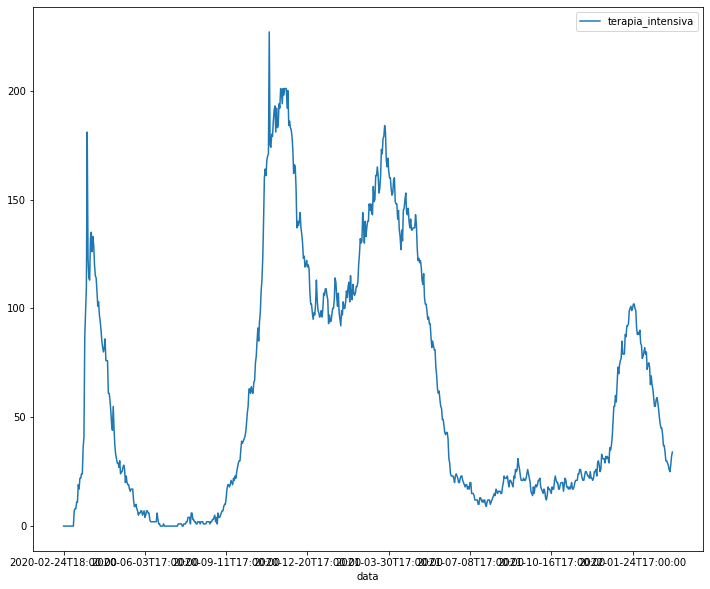

In [19]:
plt.figure()
ax = df_campania.plot(x='data',y='terapia_intensiva',figsize=(12,10))
plt.show()

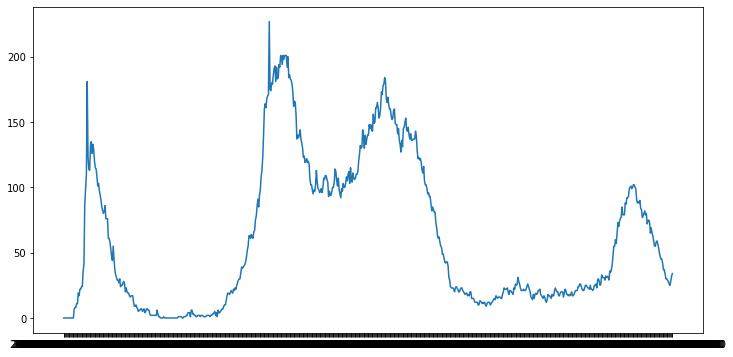

In [20]:
plt.figure(figsize=(12,6))
ax = plt.plot(df_campania['data'],df_campania['terapia_intensiva'])
plt.show()

Manipolazione delle date

In [21]:
df['data']

0        2020-02-24T18:00:00
1        2020-02-24T18:00:00
2        2020-02-24T18:00:00
3        2020-02-24T18:00:00
4        2020-02-24T18:00:00
                ...         
15745    2022-03-14T17:00:00
15746    2022-03-14T17:00:00
15747    2022-03-14T17:00:00
15748    2022-03-14T17:00:00
15749    2022-03-14T17:00:00
Name: data, Length: 15750, dtype: object

In [22]:
df['data_dt'] = pd.to_datetime(df['data'])

In [23]:
df[['data', 'data_dt']]

,data,data_dt
0,2020-02-24T18:00:00,2020-02-24 18:00:00
1,2020-02-24T18:00:00,2020-02-24 18:00:00
2,2020-02-24T18:00:00,2020-02-24 18:00:00
3,2020-02-24T18:00:00,2020-02-24 18:00:00
4,2020-02-24T18:00:00,2020-02-24 18:00:00
...,...,...
15745,2022-03-14T17:00:00,2022-03-14 17:00:00
15746,2022-03-14T17:00:00,2022-03-14 17:00:00
15747,2022-03-14T17:00:00,2022-03-14 17:00:00
15748,2022-03-14T17:00:00,2022-03-14 17:00:00


In [24]:
day_1 = df['data_dt'].min()

In [25]:
day_1

Timestamp('2020-02-24 18:00:00')

In [26]:
df['giorni'] = (df['data_dt'] - day_1).dt.days

In [27]:
df[['giorni', 'data_dt']]

,giorni,data_dt
0,0,2020-02-24 18:00:00
1,0,2020-02-24 18:00:00
2,0,2020-02-24 18:00:00
3,0,2020-02-24 18:00:00
4,0,2020-02-24 18:00:00
...,...,...
15745,748,2022-03-14 17:00:00
15746,748,2022-03-14 17:00:00
15747,748,2022-03-14 17:00:00
15748,748,2022-03-14 17:00:00


In [28]:
df_campania = df.loc[df1['denominazione_regione']=="Campania"]

In [29]:
df_campania[['giorni', 'data_dt']]

,giorni,data_dt
3,0,2020-02-24 18:00:00
24,1,2020-02-25 18:00:00
45,2,2020-02-26 18:00:00
66,3,2020-02-27 18:00:00
87,4,2020-02-28 18:00:00
...,...,...
15648,744,2022-03-10 17:00:00
15669,745,2022-03-11 17:00:00
15690,746,2022-03-12 17:00:00
15711,747,2022-03-13 17:00:00


In [30]:
df_regione = df.loc[(df['denominazione_regione']=='Piemonte') & (df['giorni']>204)].copy().reset_index(drop=True)

In [31]:
df_regione

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2,data_dt,giorni
0,2020-09-17T17:00:00,ITA,1,Piemonte,45.073274,7.680687,136,6,142,2080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-17 17:00:00,205
1,2020-09-18T17:00:00,ITA,1,Piemonte,45.073274,7.680687,140,6,146,2116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-18 17:00:00,206
2,2020-09-19T17:00:00,ITA,1,Piemonte,45.073274,7.680687,140,6,146,2158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-19 17:00:00,207
3,2020-09-20T17:00:00,ITA,1,Piemonte,45.073274,7.680687,142,7,149,2177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-20 17:00:00,208
4,2020-09-21T17:00:00,ITA,1,Piemonte,45.073274,7.680687,143,7,150,2208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-09-21 17:00:00,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2022-03-10T17:00:00,ITA,1,Piemonte,45.073274,7.680687,635,29,664,42066,...,NaN,NaN,477112.0,519282.0,4743708.0,10756632.0,ITC,ITC1,2022-03-10 17:00:00,744
540,2022-03-11T17:00:00,ITA,1,Piemonte,45.073274,7.680687,590,29,619,42311,...,NaN,NaN,477396.0,520943.0,4747731.0,10783287.0,ITC,ITC1,2022-03-11 17:00:00,745
541,2022-03-12T17:00:00,ITA,1,Piemonte,45.073274,7.680687,595,27,622,42417,...,NaN,NaN,477683.0,522558.0,4751391.0,10807423.0,ITC,ITC1,2022-03-12 17:00:00,746
542,2022-03-13T17:00:00,ITA,1,Piemonte,45.073274,7.680687,597,27,624,42710,...,NaN,NaN,477880.0,523696.0,4753979.0,10820707.0,ITC,ITC1,2022-03-13 17:00:00,747


<AxesSubplot:xlabel='giorni'>

<Figure size 864x720 with 0 Axes>

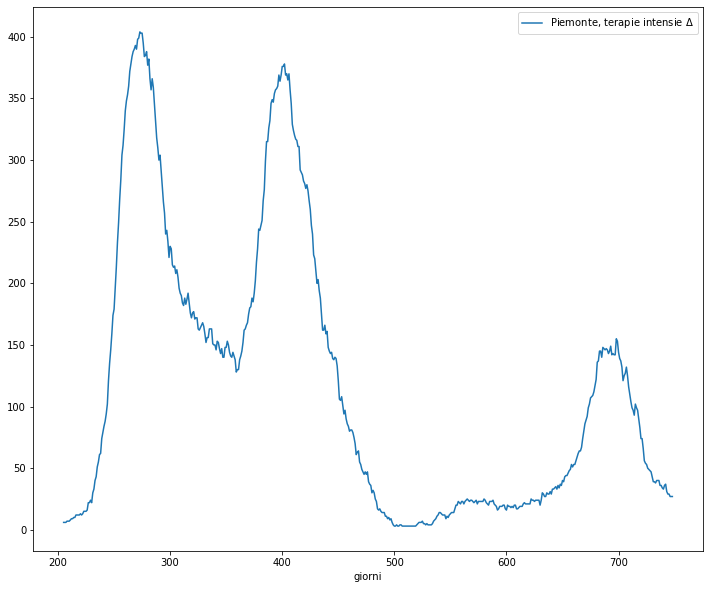

In [32]:
plt.figure(figsize=(12,10))
fig, ax = plt.subplots()
df_regione.plot(x='giorni', y='terapia_intensiva', ax=ax, figsize=(12,10), label='Piemonte, terapie intensie $\Delta$')
# In alternativa, è possibile passare direttamente le colonne del DataFramce a matplotlib:
#plt.plot(df_regione['giorni'],df_regione['terapia_intensiva'])

Per calcolare la differenza con ciascuno dei giorni precedenti basta fare lo *shift* della colonna e sottrarla alla colonna stessa:

In [33]:
df_regione['terapia_intensiva_gg']=df_regione['terapia_intensiva']-df_regione['terapia_intensiva'].shift(1)

Per fare lo stesso calcolo con un codice tradizionale che usa un loop, il codice diventa decisamente più involuto. <span style="color:blue;">Ogni volta che è possibile, conviene usare le funzioni di pandas perché sono più efficienti e richiedono meno linee di codice.</span>

In [34]:
import numpy as np
df_regione['terapia_intensiva_gg_loop'] = np.nan
prev = 0
i = 0 
for ti in df_regione['terapia_intensiva']:
    if i > 0: df_regione['terapia_intensiva_gg_loop'].at[i]=ti - prev
    prev = ti
    i += 1

In [35]:
df_regione[['terapia_intensiva', 'terapia_intensiva_gg', 'terapia_intensiva_gg_loop']]

,terapia_intensiva,terapia_intensiva_gg,terapia_intensiva_gg_loop
0,6,NaN,NaN
1,6,0.0,0.0
2,6,0.0,0.0
3,7,1.0,1.0
4,7,0.0,0.0
...,...,...,...
539,29,-2.0,-2.0
540,29,0.0,0.0
541,27,-2.0,-2.0
542,27,0.0,0.0


Per il calcolo della **media mobile**, è possibile usare la funzione [```rolling```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) che raggruppa gli ultimi valori per poter calcolare semplici indicatori statistici (somma, media, ecc.). Esistono opzioni per dare un peso ai diversi valori per usi molto particolari.

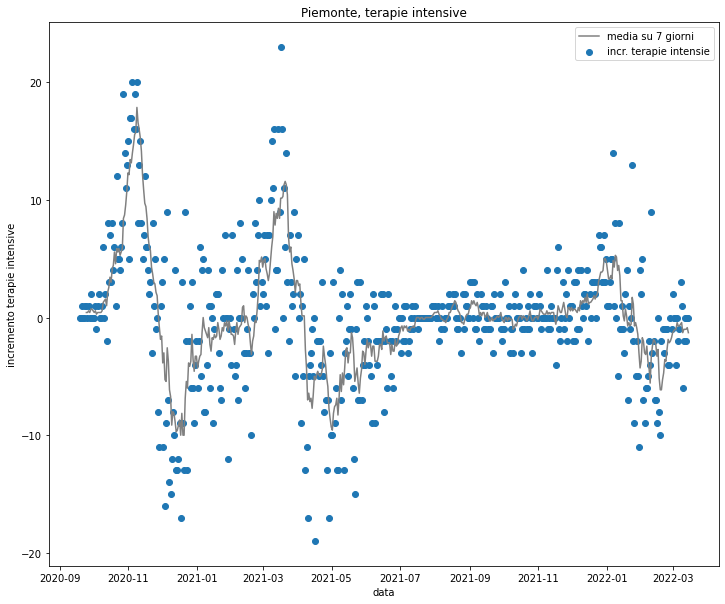

In [36]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(x=df_regione.data_dt, y=df_regione.terapia_intensiva_gg, label='incr. terapie intensie')
ax.plot(df_regione.data_dt, df_regione.terapia_intensiva_gg.rolling(window=7).mean(), color='gray', label='media su 7 giorni')
ax.set_title('Piemonte, terapie intensive')
ax.set_xlabel('data')
ax.set_ylabel('incremento terapie intensive')
ax.legend()

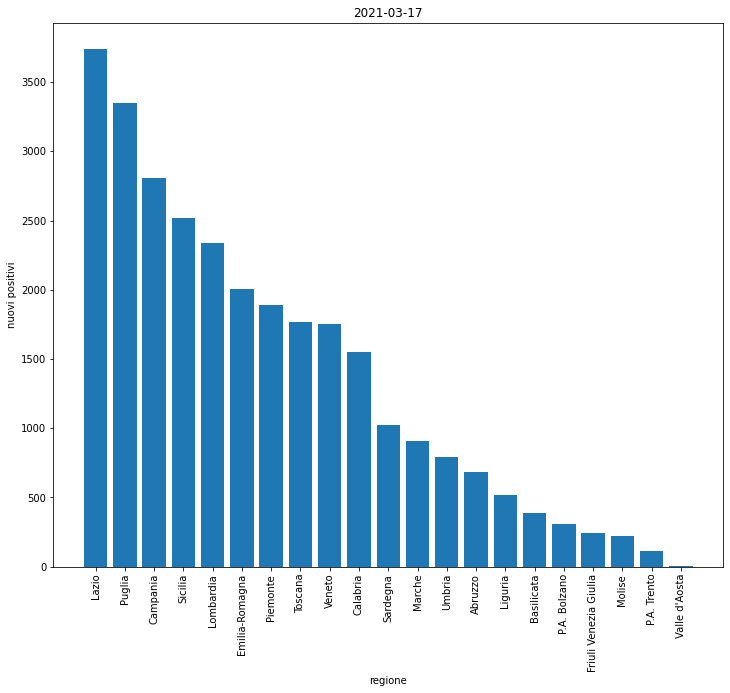

In [37]:
df_today=df[df['data']=='2022-03-14T17:00:00'].copy().reset_index(drop=True)
df_today=df_today.sort_values(by=['nuovi_positivi'], ascending=False)
fig, ax = plt.subplots(figsize=(12,10))
ax.bar(df_today['denominazione_regione'], df_today['nuovi_positivi'])
ax.set_xlabel('regione')
ax.set_ylabel('nuovi positivi')
plt.title('2021-03-17')
plt.xticks(rotation='vertical')
plt.show()

# Spunti per esercizi

* usando lo stesso dataframe del Dipartimento della Protezione Civile, fare grafici delle seguenti quantità:
    * totale positivi in Campania (o una regione che preferite) in funzione della data
    * positivi giornalieri in Campania in funzione della data
    * media mobile a 7 giorni dei positivi giornalieri in Campania in funzione della data
    * distribuzione del numero di decessi totale per regione ad oggi
    * distribuzione del numero di positivi giornalieri rispetto al numero di tamponi fatti in funzione della data
    * ...

* creare un data frame con la propria agenda telefonica.

*Hint* usare tutorial e guide in rete su come creare un DataFrame da zero. Ad esempio [questo](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

* creare un data frame con i risultati del calendario di serie A e da questo determinare la classifica.

*Hint*: alcuni dati si possono trovare [qui](https://www.kaggle.com/massibelloni/serie-a-19932017) oppure [qui](https://www.football-data.co.uk/italym.php) in formato CSV. Il significato degli acronimi si trova [qui](https://rstudio-pubs-static.s3.amazonaws.com/338127_f85723bf6d9b4637a4c5e1ff8f838432.html).

* Variazione sul tema: creare un data frame con il numero di rigori per stagione di ciascuna squadra e graficare l'andamento negli anni

*Hint*: le statistiche sui rigori ricevuti si trovano su <a href="https://www.transfermarkt.it/serie-a/topErhalteneElfmeter/wettbewerb/IT1/plus/?saison_id=2018">transfermarkt</a>. Ma non sono scaricabili in CSV. <a href="https://www.kaggle.com/emilerichard/penalty-statistics-20192020">qui</a> c'è il file per il 2019-2020.

Altri esempi di dataset si possono trovare nei seguenti repositories:
* <a href="https://datasetsearch.research.google.com/">Google dataset search</a>
* <a href="https://www.kaggle.com/">Kaggle</a>
* <a href="https://archive.ics.uci.edu/ml/index.php">Machine learning repository</a>
* <a href="https://datahub.io/">DataHub</a>
* <a href="https://data.humdata.org/dataset">HDX</a>

<span style="color: gray">Si ringrazia G. Bonifazi per le fonti citate sopra.</span>